In [ ]:
!pip install tqdm

In [ ]:
import torch
import  torchvision.datasets  as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [ ]:
transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
train_data=datasets.FashionMNIST('data',
                                 train = True,
                                 download= True,
                                 transform=transforms)

test_data = datasets.FashionMNIST('data',
                                  train=False,
                                  download=True,
                                  transform=transforms)

In [ ]:
print(f"Number of Training Samples : {len(train_data)}")
print(f"Number of Training Samples : {len(test_data)}")

Number of Training Samples : 60000
Number of Training Samples : 10000


In [ ]:
train_data[0] #(features,targetlabel)

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [ ]:
# checking 0th training sample
print(f"The input Shape of Image : {list(train_data[0][0].shape)}")

print("Label for 0th sample: ", train_data[0][1])

The input Shape of Image : [1, 28, 28]
Label for 0th sample:  9


In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

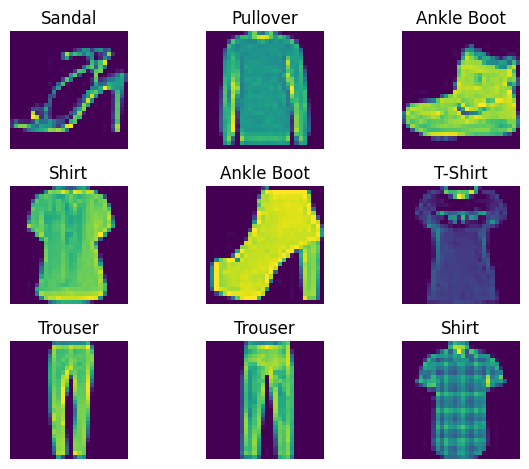

In [ ]:
fig, ax = plt.subplots(3, 3)

ax = ax.flatten()
random_numbers = np.random.randint(0, 101, 9)
for index,value in enumerate(random_numbers):
  ax[index].imshow(train_data[value][0].squeeze()) #(1, 28, 28)
  ax[index].set_title(labels_map[train_data[value][1]])
  ax[index].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Training batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Training batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


In [ ]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(in_features=28*28, out_features=512)
        self.layer2 = nn.Linear(in_features=512, out_features=256)
        self.layer3 = nn.Linear(in_features=256, out_features=128)
        self.layer4 = nn.Linear(in_features=128, out_features=64)
        self.layer5 = nn.Linear(in_features=64, out_features=32)
        self.layer6 = nn.Linear(in_features=32, out_features=10)
        self.do = nn.Dropout(0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.layer1(x))
        x = self.do(x)

        x = F.relu(self.layer2(x))
        x = self.do(x)

        x = F.relu(self.layer3(x))
        x = self.do(x)


        x = F.relu(self.layer4(x))


        x = F.relu(self.layer5(x))

        logits = self.layer6(x)
        return logits

torch.manual_seed(42)

model = ImageClassifier()

model.to(device)

ImageClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=32, bias=True)
  (layer6): Linear(in_features=32, out_features=10, bias=True)
  (do): Dropout(p=0.2, inplace=False)
)

In [ ]:
# Check model prameters (weights and bias)

model.state_dict() # list(model.parameters()) ~ this dont give the layer names

OrderedDict([('layer1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0084, -0.0058,  0.0228,  ...,  0.0293,  0.0206, -0.0119],
                      [ 0.0009,  0.0123,  0.0233,  ..., -0.0127, -0.0286,  0.0204],
                      [-0.0308,  0.0149, -0.0223,  ...,  0.0130, -0.0236, -0.0194]],
                     device='cuda:0')),
             ('layer1.bias',
              tensor([-1.5505e-02, -3.2696e-02, -1.3353e-02,  3.5505e-02,  1.5904e-02,
                       7.8679e-03,  6.5271e-03,  5.7883e-03,  2.8752e-02, -2.1171e-02,
                       2.8024e-02,  3.5634e-02,  1.5948e-02,  3.5401e-02,  2.7916e-02,
                       3.1786e-02, -1.2170e-02,  2.0021e-02, -4.7394e-03,  1.6366e-02,
                    

In [ ]:
# Create the loss function
loss_fn = nn.CrossEntropyLoss()

# Create the optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [ ]:
import torch
from tqdm import tqdm

def train(train_dataloader, test_dataloader, model, loss_fn, optimizer, epochs, device, val_interval=1):
    train_loss_values = []
    val_loss_values = []
    val_accuracy_values = []

    # Training loop
    for epoch in range(epochs):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{epochs}")

        # set model on training mode
        model.train()

        epoch_loss = 0
        step = 0
        for batch_data in tqdm(train_dataloader):
            step += 1
            inputs, labels = batch_data[0].to(device), batch_data[1].to(device)

            outputs = model(inputs)
            loss = loss_fn(outputs, labels)   # Batch loss

            optimizer.zero_grad()

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        epoch_loss /= step
        train_loss_values.append(epoch_loss)
        print(f"Epoch {epoch + 1} average training loss: {epoch_loss:.4f}")

        # Validation loop
        if (epoch + 1) % val_interval == 0:

           # Setting model in eval mode
            model.eval()


            val_epoch_loss = 0
            correct_count = 0

            with torch.inference_mode():  # with torch.no_grad():

                val_step = 0
                for val_data in test_dataloader:
                    val_step += 1
                    val_inputs, val_labels = val_data[0].to(device), val_data[1].to(device)
                    outputs = model(val_inputs)
                    loss = loss_fn(outputs, val_labels)   # Batch loss
                    val_epoch_loss += loss.item()
                    # outputs.argmax(1) it gives the index of the maximum value of row in the tensor
                    correct_count += (outputs.argmax(1) == val_labels).type(torch.float).sum().item()
                    # correct_count ~ kati ota labels correctly predict vayo tyo num store garxa

            val_epoch_loss /= val_step
            accuracy = correct_count / len(test_dataloader.dataset)
            val_loss_values.append(val_epoch_loss)
            val_accuracy_values.append(accuracy)
            print(f"Epoch {epoch + 1} average validation loss: {val_epoch_loss:.4f}")
            print(f"Validation Accuracy: {100 * accuracy:.1f}% \n")

    return train_loss_values, val_loss_values, val_accuracy_values


In [ ]:
len(train_dataloader)*32

60000

In [ ]:
epoches=10
train_loss_values, val_loss_values, val_accuracy_values = train(train_dataloader, test_dataloader, model, loss_fn, optimizer, epoches, device, val_interval=1)

----------
epoch 1/10


100%|██████████| 1875/1875 [00:26<00:00, 70.86it/s]


Epoch 1 average training loss: 0.6019
Epoch 1 average validation loss: 0.4713
Validation Accuracy: 82.9% 

----------
epoch 2/10


100%|██████████| 1875/1875 [00:17<00:00, 105.28it/s]


Epoch 2 average training loss: 0.4419
Epoch 2 average validation loss: 0.4273
Validation Accuracy: 84.8% 

----------
epoch 3/10


100%|██████████| 1875/1875 [00:17<00:00, 109.45it/s]


Epoch 3 average training loss: 0.4040
Epoch 3 average validation loss: 0.3990
Validation Accuracy: 85.9% 

----------
epoch 4/10


100%|██████████| 1875/1875 [00:18<00:00, 102.92it/s]


Epoch 4 average training loss: 0.3748
Epoch 4 average validation loss: 0.4062
Validation Accuracy: 85.6% 

----------
epoch 5/10


100%|██████████| 1875/1875 [00:17<00:00, 105.55it/s]


Epoch 5 average training loss: 0.3591
Epoch 5 average validation loss: 0.3651
Validation Accuracy: 87.0% 

----------
epoch 6/10


100%|██████████| 1875/1875 [00:18<00:00, 103.59it/s]


Epoch 6 average training loss: 0.3449
Epoch 6 average validation loss: 0.3579
Validation Accuracy: 87.1% 

----------
epoch 7/10


100%|██████████| 1875/1875 [00:17<00:00, 105.52it/s]


Epoch 7 average training loss: 0.3312
Epoch 7 average validation loss: 0.3729
Validation Accuracy: 86.9% 

----------
epoch 8/10


100%|██████████| 1875/1875 [00:16<00:00, 110.32it/s]


Epoch 8 average training loss: 0.3214
Epoch 8 average validation loss: 0.3734
Validation Accuracy: 86.9% 

----------
epoch 9/10


100%|██████████| 1875/1875 [00:17<00:00, 110.15it/s]


Epoch 9 average training loss: 0.3145
Epoch 9 average validation loss: 0.3509
Validation Accuracy: 87.5% 

----------
epoch 10/10


100%|██████████| 1875/1875 [00:18<00:00, 100.58it/s]


Epoch 10 average training loss: 0.3095
Epoch 10 average validation loss: 0.3546
Validation Accuracy: 87.6% 



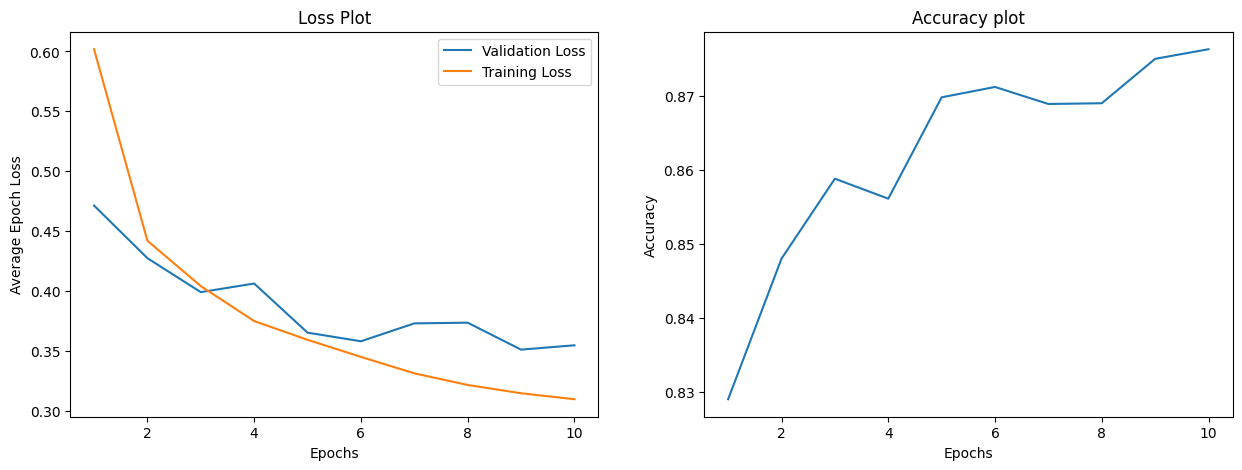

In [ ]:

val_interval = 1
plt.figure(figsize=(15, 5))

# Subplot for training and validation loss
plt.subplot(1, 2, 1) # one row 2 columns first box ma yo plot aaune
plt.title("Loss Plot")
train_num_epoch = [i + 1 for i in range(len(train_loss_values))]
val_num_epoch = [val_interval * (i + 1) for i in range(len(val_loss_values))]
plt.plot(val_num_epoch, val_loss_values)
plt.plot(train_num_epoch, train_loss_values)
plt.legend(["Validation Loss", "Training Loss"])
plt.xlabel("Epochs")
plt.ylabel("Average Epoch Loss")

# Subplot for validation accuracy
plt.subplot(1, 2, 2)
val_num_epoch = [val_interval * (i + 1) for i in range(len(val_accuracy_values))]
plt.plot(val_num_epoch, val_accuracy_values)
plt.title("Accuracy plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print(f" The test image shape is : {list(test_data[122][0].shape)}\n")
print("channel=1, height=28px width=28px")

 The test image shape is : [1, 28, 28]

channel=1, height=28px width=28px


In [ ]:
image, label= test_data[700]
image=image.unsqueeze(dim=0).to(device) #adding batch dimension
print(f" After Adding Batchsize our new test image shape is : {list(image.shape)}\n It is Image of : {labels_map[label]}")

 After Adding Batchsize our new test image shape is : [1, 1, 28, 28]
 It is Image of : Bag


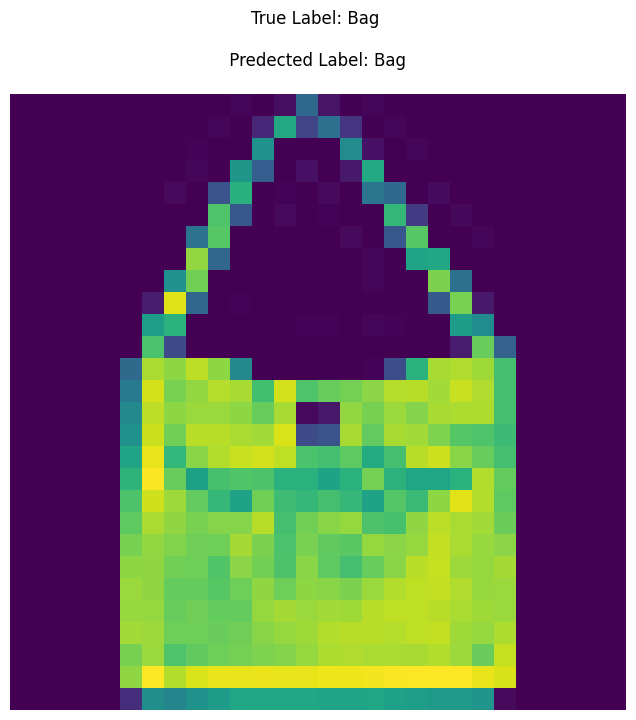

In [ ]:
model.to(device)
model.eval()

with torch.inference_mode():
    plt.figure(figsize=(10,8))
    predection=model(image)
    output=predection.argmax().item()
    plt.title(f"True Label: {labels_map[label]} \n\n Predected Label: {labels_map[output]} \n")
    plt.imshow(image.squeeze().cpu()) # image.squeeze().cpu().shape gives [28, 28]
    plt.axis("off")
    plt.plot()

### Model Saving

#### Saving the entire model
* When we save the model with this approach, we could easily load the model without needing its architecture.
* But we could not resume training.

In [ ]:
torch.save(model, "model.pth")

#### Loading the saved model

In [ ]:
loaded_model = torch.load("model.pth")
loaded_model

ImageClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=32, bias=True)
  (layer6): Linear(in_features=32, out_features=10, bias=True)
  (do): Dropout(p=0.2, inplace=False)
)

#### Saving model state and relevant information
* When we save the model with this approach, we need to load the model architecture first and then only we could load the weights.
* We could resume training from the saved checkpoint.

In [ ]:
checkpoint = {
    "model_state": model.state_dict(),
    "optimizer_state": optimizer.state_dict(),
    "train_loss": train_loss_values,
    "val_loss": val_loss_values,
    "val_accuracy": val_accuracy_values
}
torch.save(checkpoint, 'checkpoint.pth.tar')

#### Loading the saved checkpoint

In [ ]:
# Loading the checkpoint
checkpoint = torch.load("/content/checkpoint.pth.tar")

# First load the model architecture i.e. instantiate the model class and optimizer
Lmodel = ImageClassifier()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Then load the model weights and optimizer state
Lmodel.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optimizer_state'])

# We can use these values for plotting
train_loss_values = checkpoint['train_loss']
val_loss_values = checkpoint['val_loss']
val_accuracy_values = checkpoint['val_accuracy']

In [ ]:
image, label= test_data[200]
image=image.unsqueeze(dim=0).to(device)

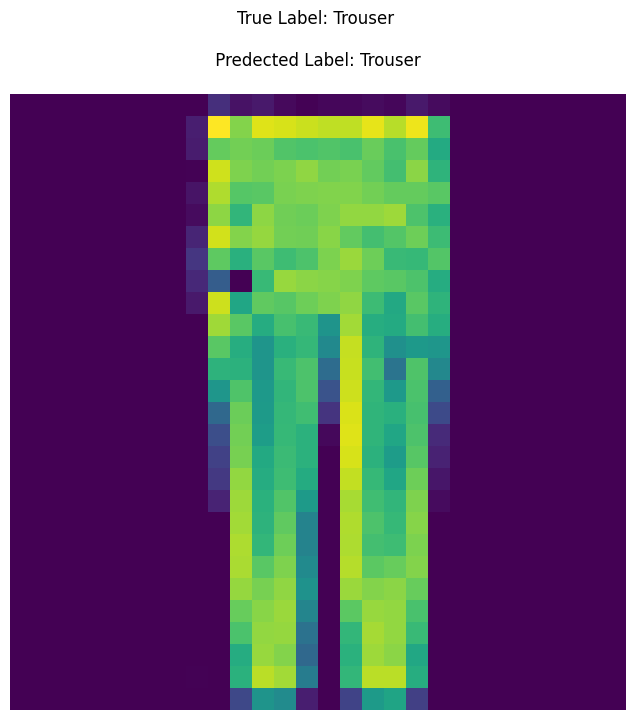

In [ ]:
Lmodel.to(device)
Lmodel.eval()

with torch.inference_mode():
    plt.figure(figsize=(10,8))
    predection=Lmodel(image)
    output=predection.argmax().item()
    plt.title(f"True Label: {labels_map[label]} \n\n Predected Label: {labels_map[output]} \n")
    plt.imshow(image.squeeze().cpu()) # image.squeeze().cpu().shape gives [28, 28]
    plt.axis("off")
    plt.plot()

### Model Quantization and Conversion
* Model quantization refers to techniques for performing computations and storing tensors at lower bitwidths (usually int8) than floating point precision.
* Quantization enables:
    * 4x reduction in model size;
    * 2-4x reduction in memory bandwidth;
    * 2-4x faster inference due to savings in memory bandwidth and faster compute with int8 arithmetic (the exact speed up varies depending on the hardware, the runtime, and the model).
* In model conversion, we will convert the native pytorch model to ONNX(Open Neural Network Exchange) format which is open standard format for representing machine learning models

#### Quantizating model to int8 Precision

In [ ]:
convert_model = model
quantized_model = torch.quantization.quantize_dynamic(model, {torch.nn.Linear}, dtype=torch.qint8)
print(quantized_model)

ImageClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): DynamicQuantizedLinear(in_features=784, out_features=512, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  (layer2): DynamicQuantizedLinear(in_features=512, out_features=256, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  (layer3): DynamicQuantizedLinear(in_features=256, out_features=128, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  (layer4): DynamicQuantizedLinear(in_features=128, out_features=64, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  (layer5): DynamicQuantizedLinear(in_features=64, out_features=32, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  (layer6): DynamicQuantizedLinear(in_features=32, out_features=10, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  (do): Dropout(p=0.2, inplace=False)
)


In [ ]:
# Savimg quantized model
torch.save(quantized_model, "quantized_model.pth")

### ONNX Conversion

In [ ]:
# Install the dependencies for model conversion
!pip -q install onnxruntime
!pip -q install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 50.2 MB/s eta 0:00:00


In [ ]:
dummy_input = torch.randn(1, 1, 28, 28).to(device)
torch.onnx.export(model.to(device), dummy_input, "quantized_model.onnx")

'''
dummy_input is needed
to trace the operations and define the input shape for the model onnx
'''

'\ndummy_input is needed\nto trace the operations and define the input shape for the model onnx\n'

### Inference on Quantized Model

In [ ]:
# cell 51
import onnxruntime as ort

EP_list = ['CPUExecutionProvider']
ort_sess = ort.InferenceSession("quantized_model.onnx", providers=EP_list)
input_name = ort_sess.get_inputs()[0].name

image, label = test_data[0]
input_data = np.expand_dims(image, axis=0)
outputs = ort_sess.run(None, {input_name: input_data})[0]
prediction_index = outputs.argmax().item()
print("Label: ", label)
print("Predicted: ", prediction_index)

Label:  9
Predicted:  9
